# Insurance Prediction

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff

#from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
train = pd.read_csv('train_data.csv', sep=',')
test = pd.read_csv('test_data.csv', sep=',')

In [3]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
test.sample(4)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
667,H10670,2016,1.000000,0,V,V,V,U,610.0,2,1960.0,.,13204
548,H7630,2012,1.000000,0,V,N,O,R,2000.0,1,1960.0,1,13056
1622,H811,2012,0.833333,0,V,V,V,U,300.0,1,1960.0,.,58194
2819,H10229,2014,1.000000,0,V,N,O,R,300.0,3,1900.0,4,93032


In [5]:
train.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [6]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [8]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [9]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

## Handle the Missing Values

In [10]:
#Fill the missing values
train[['Building Dimension', 'Date_of_Occupancy']] = train[['Building Dimension', 'Date_of_Occupancy']].fillna((train[['Building Dimension', 'Date_of_Occupancy']].mean()))
test[['Building Dimension', 'Date_of_Occupancy']] = test[['Building Dimension', 'Date_of_Occupancy']].fillna((test[['Building Dimension', 'Date_of_Occupancy']].mean()))

In [11]:
#Fill the null categorical variables
train['Geo_Code'] = train.groupby('Building_Type')['Geo_Code'].transform(lambda x: x.fillna(x.mode()[0]))
test['Geo_Code'] = test.groupby('Building_Type')['Geo_Code'].transform(lambda x: x.fillna(x.mode()[0]))
train['Garden'] = train.groupby('Building_Type')['Garden'].transform(lambda x: x.fillna(x.mode()[0]))
test['Garden'] = test.groupby('Building_Type')['Garden'].transform(lambda x: x.fillna(x.mode()[0]))

In [12]:
#Replace the . in the number of windows with '0'
train['NumberOfWindows'] = train['NumberOfWindows'].replace({'   .': '0', '>=10': '10'})
test['NumberOfWindows'] = test['NumberOfWindows'].replace({'   .': '0', '>=10': '10'})

In [13]:
train['NumberOfWindows'].sample(6)

4254    4
1342    0
75      0
5936    0
2511    6
2148    0
Name: NumberOfWindows, dtype: object

In [14]:
train.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [15]:
train[['Building_Painted','Building_Fenced', 'Garden', 'Settlement', 'Residential', 'Building_Type']] = train[['Building_Painted','Building_Fenced', 'Garden', 'Settlement', 'Residential', 'Building_Type']].astype('category')
test[['Building_Painted','Building_Fenced', 'Garden', 'Settlement', 'Residential', 'Building_Type']] = test[['Building_Painted','Building_Fenced', 'Garden', 'Settlement', 'Residential', 'Building_Type']].astype('category')

In [16]:
train[['Date_of_Occupancy', 'NumberOfWindows']] = train[['Date_of_Occupancy', 'NumberOfWindows']].astype('int64')
test[['Date_of_Occupancy', 'NumberOfWindows']]= test[['Date_of_Occupancy', 'NumberOfWindows']].astype('int64')

In [17]:
train['Insured_Period'] = train['Insured_Period'].round(3)
test['Insured_Period'] = test['Insured_Period'].round(3)

In [18]:
train.drop(columns='Geo_Code', inplace=True)
test.drop(columns='Geo_Code', inplace=True)

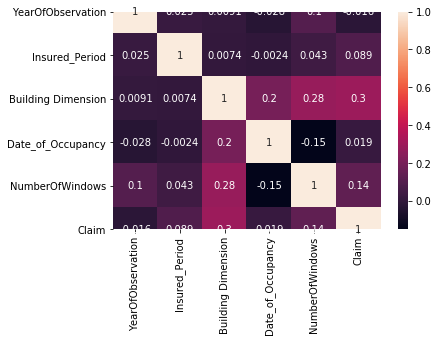

In [19]:
sns.heatmap(train.corr(), annot=True,)

In [20]:
train.sample(3)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
66,H12872,2014,1.000,0,V,N,O,R,2050.0,1,2007,5,0
3673,H4172,2012,1.000,0,V,V,V,U,465.0,2,1980,0,0
1946,H17681,2014,0.748,0,V,N,O,R,1730.0,1,1971,3,0


In [21]:
px.histogram(train, x='Settlement')

In [22]:
px.histogram(train, x='Building_Type')

In [23]:
px.histogram(train, x='NumberOfWindows', color='Building_Type')

In [24]:
px.scatter(train, x='Insured_Period')

In [25]:
px.box(train, x='NumberOfWindows')

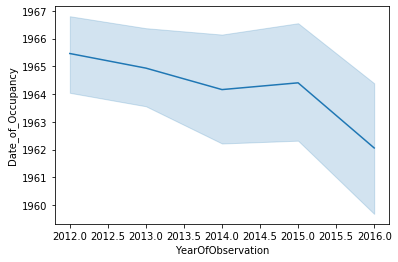

In [26]:
#px.violin(train, x='Insured_Period')
sns.lineplot(x='YearOfObservation', y='Date_of_Occupancy', data=train)

In [27]:
#sns.pairplot(train)

In [28]:
px.parallel_categories(train, dimensions=['Building_Painted','Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows'])

In [29]:
px.parallel_categories(train, dimensions=['YearOfObservation','Residential', 'Building_Type', 'Claim'])

In [30]:
train.sample()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
5523,H16829,2012,1.0,1,V,N,O,R,4910.0,2,1970,6,1


# Model Building

In [31]:
# Transform all categorical features to numerical
train = pd.get_dummies(train, columns=['Building_Painted','Building_Fenced', 'Garden', 'Settlement', 'Residential', 'Building_Type'])
test = pd.get_dummies(test, columns=['Building_Painted','Building_Fenced', 'Garden', 'Settlement', 'Residential', 'Building_Type'])

In [32]:
#Create function to run through the data pipeline
target = 'Claim'
IDCol = ['Customer Id']

def modelfit(algorithm, dtrain, dtest, predictors, target, IDCol, filename):
    #Fit the algorithm on the data set
    algorithm.fit(dtrain[predictors], dtrain[target])

    #Predict training set
    dtrain_predictions = algorithm.predict(dtrain[predictors])

    #Perform cross-validation
    #cv_score = cross_val_score(algorithm, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')     
    #cv_score = np.sqrt(np.abs(cv_score))

    #Print model Report
    print ('\nModel Report')
    #print ('RMSE : %.4g' % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    #print ("CV Score: Mean - %.4g | Std - %.4g' | Min - %.4g | Max - %.4g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    print(metrics.classification_report(dtrain[target].values, dtrain_predictions))
    print('Accuracy Score: %.4g' % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print(metrics.confusion_matrix(dtrain[target].values, dtrain_predictions))
    
    #Predict on testing data
    dtest[target] = algorithm.predict(dtest[predictors])

    #Export submission file
    IDCol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDCol})
    submission.to_csv(filename, index=False)

In [33]:
predictors = [x for x in train.columns if x not in [target]+IDCol]

In [36]:
# Decison Tree Classifier
dTreeClass = DecisionTreeClassifier()
modelfit(dTreeClass, train, test, predictors,target,IDCol,'DecisionTreeSubmission.csv')


Model Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5526
           1       1.00      0.97      0.98      1634

    accuracy                           0.99      7160
   macro avg       0.99      0.98      0.99      7160
weighted avg       0.99      0.99      0.99      7160

Accuracy Score: 0.9927
[[5524    2]
 [  50 1584]]


In [37]:
# Random Forest Classifier
randForClass = RandomForestClassifier()
modelfit(randForClass, train, test, predictors,target,IDCol,'RandomForestSubmission.csv')

C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


Model Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5526
           1       0.98      0.87      0.92      1634

    accuracy                           0.97      7160
   macro avg       0.97      0.93      0.95      7160
weighted avg       0.97      0.97      0.96      7160

Accuracy Score: 0.9656
[[5499   27]
 [ 219 1415]]


In [38]:
gradBoostClass = GradientBoostingClassifier()
modelfit(gradBoostClass, train, test, predictors,target,IDCol,'gradBoostSubmission.csv')


Model Report
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5526
           1       0.73      0.23      0.35      1634

    accuracy                           0.80      7160
   macro avg       0.77      0.60      0.62      7160
weighted avg       0.79      0.80      0.76      7160

Accuracy Score: 0.8045
[[5385  141]
 [1259  375]]


In [39]:
nnClass = MLPClassifier()
modelfit(nnClass, train, test, predictors,target,IDCol,'nnSubmission.csv')


Model Report
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      5526
           1       0.56      0.10      0.17      1634

    accuracy                           0.78      7160
   macro avg       0.67      0.54      0.52      7160
weighted avg       0.73      0.78      0.71      7160

Accuracy Score: 0.7765
[[5401  125]
 [1475  159]]
